<h1>Exploratory Data Analysis</h1>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic (1).csv')

In [ ]:
null_count =data.isnull().sum()
columns_with_null  =null_count[null_count>0]
for column_name,null_count in columns_with_null.items():
 print(f" Column '{column_name}' has {null_count} null value(s).")

 Column 'Age' has 177 null value(s).
 Column 'Cabin' has 687 null value(s).
 Column 'Embarked' has 2 null value(s).


In [ ]:
data.mean()

<ipython-input-6-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [ ]:
data.std()

<ipython-input-7-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [ ]:
numeric_column =data.select_dtypes(include=['number'])
means =numeric_column.mean()
std_derivation =numeric_column.std()
for column_name in means.index:
     print(f" Column '{column_name}' :")
     print(f" Mean : {means[column_name]}")
     print(f" std_derivation : {std_derivation[column_name]}")

 Column 'PassengerId' :
 Mean : 446.0
 std_derivation : 257.3538420152301
 Column 'Survived' :
 Mean : 0.3838383838383838
 std_derivation : 0.4865924542648575
 Column 'Pclass' :
 Mean : 2.308641975308642
 std_derivation : 0.836071240977049
 Column 'Age' :
 Mean : 29.69911764705882
 std_derivation : 14.526497332334042
 Column 'SibSp' :
 Mean : 0.5230078563411896
 std_derivation : 1.1027434322934317
 Column 'Parch' :
 Mean : 0.38159371492704824
 std_derivation : 0.8060572211299483
 Column 'Fare' :
 Mean : 32.204207968574636
 std_derivation : 49.6934285971809


male      577
female    314
Name: Sex, dtype: int64

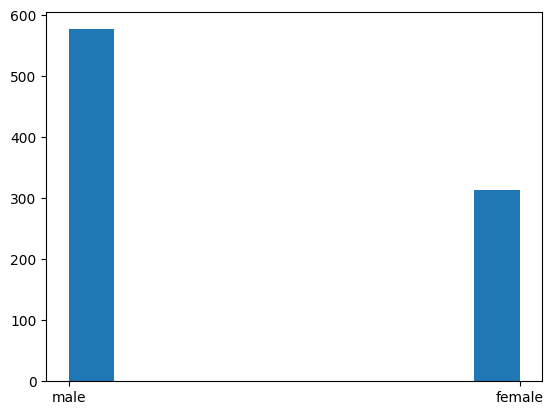

In [ ]:
from matplotlib import pyplot as plt

plt.hist(data['Sex'])
data['Sex'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

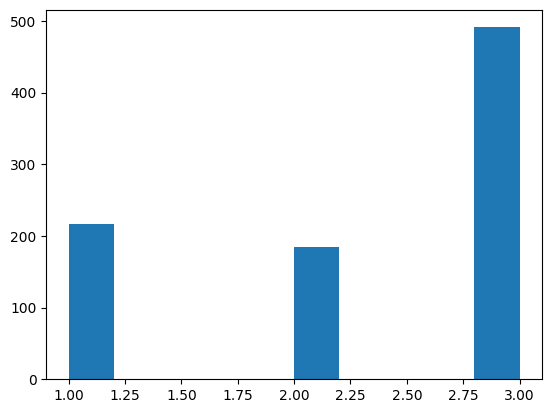

In [ ]:
from matplotlib import pyplot as plt

plt.hist(data['Pclass'])
data['Pclass'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


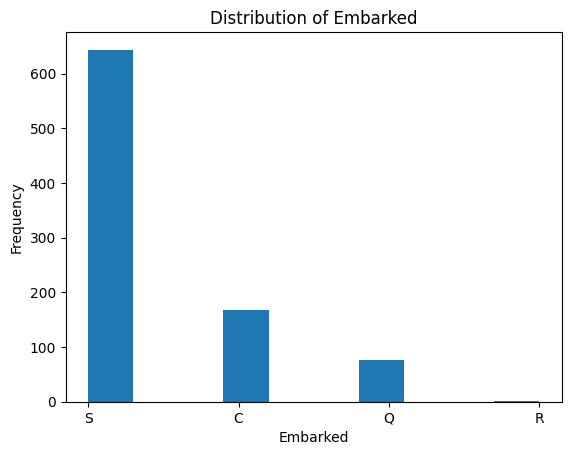

In [ ]:
from matplotlib import pyplot as plt
print(data['Embarked'].value_counts())

Embarked_mode = data['Embarked'].mode()
data['Embarked'].fillna(value=Embarked_mode, inplace=True)
data['Embarked'].fillna('Unknown', inplace=True)
data['Embarked'] = data['Embarked'].str.strip() # Remove leading/trailing whitespace
data['Embarked'] = data['Embarked'].astype(str)
new_category_label = 'R'
data['Embarked'] = data['Embarked'].replace('Unknown', new_category_label)
plt.hist(data['Embarked'])
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Distribution of Embarked')
plt.show()

In [ ]:
column_means = data.mean()
data_filled =data.fillna(column_means)


<ipython-input-12-63cf85c34875>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = data.mean()


In [ ]:
group_data = data.groupby('Sex')
group_means =group_data.mean()
group_means

<ipython-input-13-822486a1129c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_means =group_data.mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [ ]:
group_data1 = data.groupby('Pclass')
group_means1 =group_data1.mean()
group_means1

<ipython-input-14-1b8a4797a853>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_means1 =group_data1.mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
group_data2 = data.groupby('Embarked')
group_means2 =group_data2.mean()
group_means2

<ipython-input-15-72e8ef1ff513>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_means2 =group_data2.mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
R,446.000000,1.000000,1.000000,50.000000,0.000000,0.000000,80.000000
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812
